In [1]:
import yfinance as yf
import pandas as pd

# Configuração
ativos = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD']
intervalo = '1d'
periodo = '2y'

# Adicione este parâmetro para forçar dados reais
dados = yf.download(
    tickers=ativos,
    interval=intervalo,
    period=periodo,
    progress=False,
    group_by='ticker',
    auto_adjust=True,  # ← Novo padrão do yfinance
    ignore_tz=True  # ← Corrige problemas de fuso horário
)

# Processamento
dados_clean = dados.copy()

# Salvar e mostrar
dados_clean = dados.copy()
dados_clean.to_csv('../data/crypto_prices.csv')
print("✅ Dados salvos em data/crypto_prices.csv")
print(dados_clean.tail(3))

✅ Dados salvos em data/crypto_prices.csv
Ticker            BTC-USD                                               \
Price                Open           High            Low          Close   
Date                                                                     
2025-05-29  107795.570312  108910.046875  105374.398438  105641.757812   
2025-05-30  105646.210938  106308.945312  103685.789062  103998.570312   
2025-05-31  104007.585938  104835.898438  103220.765625  104754.218750   

Ticker                      SOL-USD                                      \
Price            Volume        Open        High         Low       Close   
Date                                                                      
2025-05-29  56022752042  172.190598  175.184280  166.258514  166.588181   
2025-05-30  57655287183  166.593430  167.347122  156.034653  156.234711   
2025-05-31  42279723008  156.248901  157.738541  152.443512  157.738541   

Ticker                  ...      ETH-USD                       

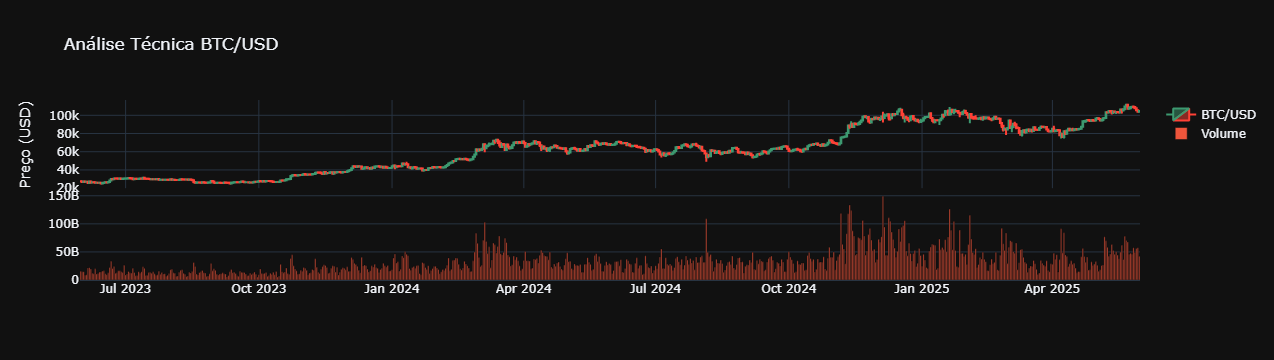

In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar figura com subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

# Gráfico de preços
fig.add_trace(go.Candlestick(
    x=dados.index,
    open=dados['BTC-USD']['Open'],
    high=dados['BTC-USD']['High'],
    low=dados['BTC-USD']['Low'],
    close=dados['BTC-USD']['Close'],
    name='BTC/USD'
), row=1, col=1)

# Gráfico de volume
fig.add_trace(go.Bar(
    x=dados.index,
    y=dados['BTC-USD']['Volume'],
    name='Volume'
), row=2, col=1)

# Layout
fig.update_layout(
    title='Análise Técnica BTC/USD',
    yaxis_title='Preço (USD)',
    xaxis_rangeslider_visible=False,
    template='plotly_dark'
)

fig.show()

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.kaleido.scope.mathjax = None
import pandas as pd
import os

# Carregar os dados
dados = pd.read_csv('../data/crypto_prices.csv', index_col=0, parse_dates=True, header=[0,1])

# Lista de criptomoedas disponíveis
criptos = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD']

# Criar figura com subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

# Adicionar os gráficos (inicialmente mostra BTC)
fig.add_trace(go.Candlestick(
    x=dados.index,
    open=dados[('BTC-USD','Open')],
    high=dados[('BTC-USD','High')],
    low=dados[('BTC-USD','Low')],
    close=dados[('BTC-USD','Close')],
    name='Crypto/USD'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=dados.index,
    y=dados[('BTC-USD','Volume')],
    name='Volume Crypto'
), row=2, col=1)

# Layout
# Substitua a configuração do update_layout por:
fig.update_layout(
    title='Análise Técnica Criptomoedas',
    yaxis_title='Preço (USD)',
    yaxis2_title='Volume',
    xaxis_rangeslider_visible=False,
    template='plotly_dark',
    height=800,  # Altura fixa
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    updatemenus=[
        {
            "buttons": [
                {
                    "method": "restyle",
                    "label": crypto,
                    "args": [
                        {
                            "open": dados[(crypto,'Open')],
                            "high": dados[(crypto,'High')],
                            "low": dados[(crypto,'Low')],
                            "close": dados[(crypto,'Close')],
                            "y": dados[(crypto,'Volume')]
                        },
                        {
                            "title": f"Análise Técnica {crypto}",
                            "yaxis.type": "linear",
                            "yaxis2.type": "linear"
                        }
                    ]
                }
                for crypto in criptos
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.1,
            "y": 1.15
        }
    ]
)

# Adicione estas configurações específicas:
fig.update_yaxes(
    fixedrange=True,  # Impede zoom/ajuste automático
    row=1, col=1
)

fig.update_yaxes(
    type="linear",
    fixedrange=True,
    row=2, col=1
)

# Criar diretório se não existir
os.makedirs('../assets/images', exist_ok=True)
os.makedirs('../assets/dashboards', exist_ok=True)

# Salvar como imagem PNG (estático)
fig.write_image(
    "../assets/images/crypto_analysis.png",
    width=1200,
    height=800,
    engine='kaleido'  # Força usar kaleido
)

# Salvar como HTML interativo
fig.write_html(
    "../assets/dashboards/crypto_dashboard.html",
    include_plotlyjs='cdn',
    full_html=False,
    config={'displayModeBar': True}
)

print("✅ Gráfico salvo como:")
print("- PNG: assets/images/crypto_analysis.png")
print("- HTML: assets/dashboards/crypto_dashboard.html")

fig.show()

AttributeError: 'NoneType' object has no attribute 'mathjax'